In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import viz # curriculum example visualizations

In [2]:
men = np.random.choice([1, 2, 3, 4], size = [10000, 6])

In [3]:
mage1d = men.sum(axis = 1)
x = mage1d.reshape(10000, 1)

In [4]:
mage2a = np.random.choice([1, 2, 3, 4, 5, 6], size = [10000, 4])
mage2a

array([[6, 5, 3, 1],
       [3, 2, 5, 2],
       [3, 3, 2, 1],
       ...,
       [5, 3, 5, 6],
       [2, 4, 2, 4],
       [4, 4, 1, 3]])

In [5]:
attack2 = mage2a.sum(axis = 1)

In [6]:
y = attack2.reshape(10000, 1)

In [7]:
m2attack1 = np.append(x, y, axis = 1)

In [8]:
m2attack1

array([[15, 15],
       [20, 12],
       [14,  9],
       ...,
       [11, 19],
       [19, 12],
       [12, 12]])

In [9]:
pd.DataFrame(m2attack1).apply(lambda hgh: hgh[0] < hgh[1], axis = 1).mean() 
# probability that mage 2 will beat mage 1


0.3706

In [10]:
pd.DataFrame(m2attack1).apply(lambda hgh: hgh[0] > hgh[1], axis = 1).mean()
##

0.5413

# rvs - random value generation


In [11]:
dice_distribution = stats.randint(1,7)

In [12]:
dice_distribution.rvs(5)

array([1, 6, 5, 4, 3])

In [13]:
##for a matrix, use dimension (row, col)
dice_distribution.rvs((5,5))
## rvs is a way to get a random sequence of numbers

array([[2, 4, 3, 6, 3],
       [3, 6, 4, 3, 6],
       [1, 4, 3, 3, 4],
       [5, 4, 2, 1, 3],
       [2, 5, 1, 2, 5]])

In [14]:
n = 10000000
x = dice_distribution.rvs(n)

In [15]:
x

array([2, 5, 5, ..., 1, 5, 4])

Text(0.5, 1.0, 'Outcome of 10,000,000 Dice Rolls')

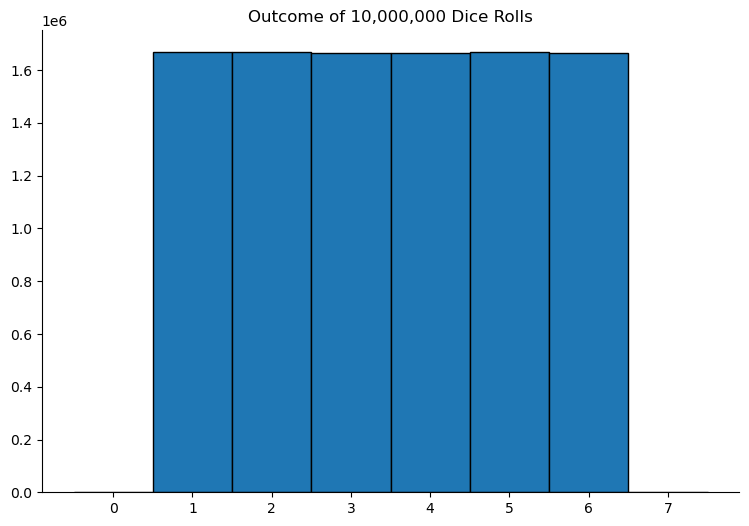

In [16]:
plt.hist(x, bins = range (0,9), align = 'left', width = 1, edgecolor = 'black')
plt.title(f'Outcome of {n:,} Dice Rolls')

In [17]:
## use pmf to find the probability that a roll = 3
dice_distribution.pmf(3)

0.16666666666666666

## December 5th, Warm UP:

In [18]:
from pydataset import data

In [19]:
cake = data("cake")

$H_0$ : there is no difference in average temperature between the 3 different recipes
$\mu_{a} == \mu _{b} == \mu _{c}$

$H_a$ : there is a difference between the 3 different recipes
$\mu_{a} != \mu _{b} != \mu _{c}$

In [20]:
cakeA = cake[cake['recipe'] == 'A']
cakeB = cake[cake['recipe'] == 'B']
cakeC = cake[cake['recipe'] == 'C']


In [21]:
stats.f_oneway(cakeA.temperature, cakeB.temperature, cakeC.temperature)

F_onewayResult(statistic=0.0, pvalue=1.0)

## Fail to reject the null

In [22]:
import env
import seaborn as sns

In [26]:
def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
url = get_db_url(env.username, env.password, env.host, db='telco_churn')

In [29]:
query = 'select * from customers'

In [31]:
df = pd.read_sql(query, url)

# Does tenure correlate with total charges?

### Hypotheses:

#### $H_0$ : There is no linear correlation between tenure and total charges
#### $H_a$ : There is a linear correlation between tenure and total charges


In [53]:
alpha = 0.05
# select data
total_charges_df = df[['tenure', 'total_charges']]
total_charges_df

,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65


In [57]:
# get rid of nulls/NA/naan in a column:
total_charges_df.total_charges.sort_values()
total_charges_df['total_charges'] = total_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# assign total_charges column that has blanks to 0:


/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_20996/727599955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charges_df['total_charges'] = total_charges_df['total_charges'].str.replace(' ', '0').astype('float')


In [60]:
r, p = stats.spearmanr(total_charges_df.tenure, total_charges_df.total_charges)

In [62]:
r, p
# there is a strong linear correlation between tenure and total charge

(0.8896957900597577, 0.0)

## is there a correlation between tenure and monthly charges when controlling


$H_0$ : there is no linear correlation between tenure and monthly charges

$H_a$: there is a linear correlation

In [ ]:
phone